In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/BMW-M5-k/Datasets/main/Weather%20Dataset.csv') #importing the csv file from github

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Missing values:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
Duplicate rows: 1259


In [5]:
# Identify and handle incorrect data (e.g., unrealistic values)
def clean_data(df):
    df['Temperature (C)'] = df['Temperature (C)'].clip(lower=-10, upper=60)
    df['Apparent Temperature (C)'] = df['Apparent Temperature (C)'].clip(lower=-10, upper=60)
    df['Humidity'] = df['Humidity'].clip(lower=0, upper=1)
    df['Visibility (km)'] = df['Visibility (km)'].clip(lower=0, upper=50)
    df['Loud Cover'] = df['Loud Cover'].clip(lower=0, upper=1)
    df['Pressure (millibars)'] = df['Pressure (millibars)'].clip(lower=900, upper=1050)
    return df

# Clean the dataset
cleaned_data = clean_data(data.copy())

# Drop duplicates
cleaned_data = cleaned_data.drop_duplicates()

# Display the results of the cleaning process
print(cleaned_data.describe())
print(cleaned_data.head())

       Temperature (C)  Apparent Temperature (C)     Humidity  \
count      2521.000000               2521.000000  2521.000000   
mean         10.133737                  9.073406     0.807640   
std           8.820493                  9.923272     0.162764   
min         -10.000000                -10.000000     0.000000   
25%           2.155556                 -0.294444     0.710000   
50%          10.577778                 10.577778     0.860000   
75%          17.150000                 17.150000     0.930000   
max          32.638889                 35.494444     1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count        2521.000000             2521.000000      2521.000000      2521.0   
mean           10.011831              201.519635         8.827583         0.0   
std             5.962815               91.274419         4.547705         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%      

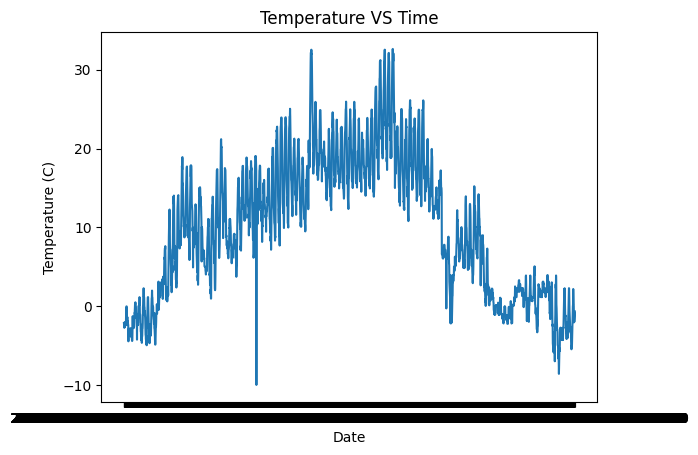

In [6]:
cleaned_data = cleaned_data.sort_values(by='Formatted Date')
plt.plot(cleaned_data['Formatted Date'], cleaned_data['Temperature (C)'])
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature VS Time')
plt.show()

In [7]:
plt.hist(cleaned_data['Temperature (C)'], bins=20, edgecolor='black')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.show()

<ipython-input-8-84c059cef954>:6: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 2,0.01)
<ipython-input-8-84c059cef954>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.5, 1,0.01)


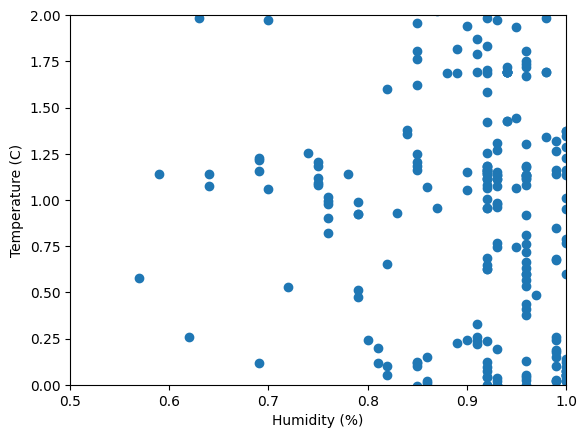

In [8]:
cleaned_data = cleaned_data.sort_values(by='Humidity')

plt.scatter(cleaned_data['Humidity'], cleaned_data['Temperature (C)'])


plt.ylim(0, 2,0.01)
plt.xlim(0.5, 1,0.01)
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (C)')
plt.show()


In [10]:
cleaned_data['Formatted Date'] = pd.to_datetime(cleaned_data['Formatted Date'], utc=True)


numeric_columns = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                   'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                  'Visibility (km)', 'Pressure (millibars)']


matrix = cleaned_data[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Weather Correlation Heatmap ')
plt.show()

#Correlation Heatmap of Weather dataset:



*   The red squares (~=1) represent strong correlation (such as Temperature with Apparent Temperature)
*   The Blue squares (-ve numbers) represent inverse / negative correlation (such as Humidity with Temperature)
* The numbers in between represend different levels of correlation between data (medium - weak)






